In [1]:
import pandas as pd
import numpy as np

from pandas import Series as s, DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import r2_score , mean_squared_error 
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
 


import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

#setting configs plot size 5x4 inches and seaborn style whitegrid
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder


from xgboost import  XGBClassifier , XGBRegressor



/Users/rakeshkumar/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#get the folder path
%pwd

'/Users/rakeshkumar/Desktop/ML_Imp/AI/DataScience/xgBoost'

In [3]:
hp = pd.read_csv("hp_data.csv")

In [4]:

print("Shape is   :  ",hp.shape)
print()

print("No of cloumns  :  ",hp.columns)
print()

print("Print fisrt 1 items  :  ")
print(hp.head(1))
print()

print("Checking missing value   :  ")
print(hp.isnull().sum())




Shape is   :   (3500, 10)

No of cloumns  :   Index(['id', 'price', 'place', 'built', 'sqft', 'sale', 'yearsOld', 'floor',
       'totalFloor', 'bhk'],
      dtype='object')

Print fisrt 1 items  :  
     id    price       place                 built  sqft    sale  yearsOld  \
0  1341  6300000  BTM Layout  Super built-up  Area  1450  Resale         5   

   floor  totalFloor  bhk  
0      1           4    1  

Checking missing value   :  
id            0
price         0
place         0
built         0
sqft          0
sale          0
yearsOld      0
floor         0
totalFloor    0
bhk           0
dtype: int64


In [5]:
enc = LabelEncoder()

In [6]:
hp.place= enc.fit_transform(hp.place)
hp.sale = enc.fit_transform(hp.sale)
hp.built = enc.fit_transform(hp.built)


In [7]:
hp.head(2)

,id,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,2,1,1450,0,5,1,4,1
1,2126,11500000,14,1,2190,0,5,3,5,3


In [8]:
#hp.describe

/Users/rakeshkumar/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


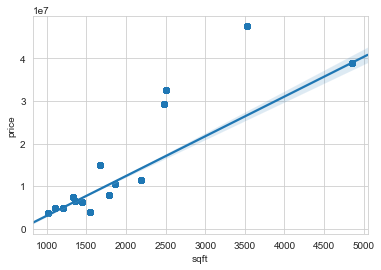

In [9]:
sb.regplot(x="sqft", y="price", data=hp)

/Users/rakeshkumar/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


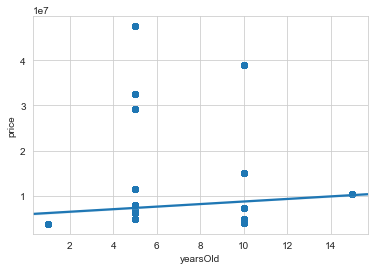

In [10]:
sb.regplot(x="yearsOld", y="price", data=hp)

/Users/rakeshkumar/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


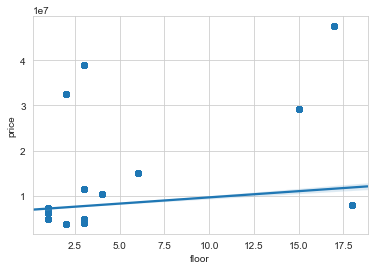

In [11]:
sb.regplot(x="floor", y="price", data=hp)

/Users/rakeshkumar/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


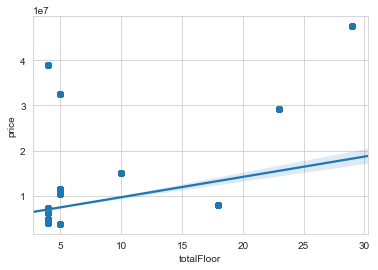

In [12]:
sb.regplot(x="totalFloor", y="price", data=hp)

/Users/rakeshkumar/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


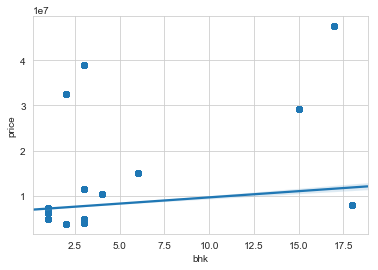

In [13]:
sb.regplot(x="bhk", y="price", data=hp)

/Users/rakeshkumar/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


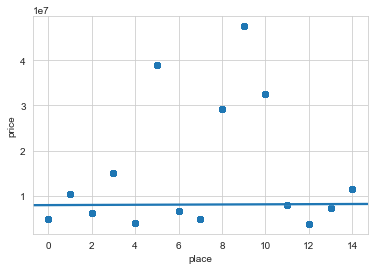

In [14]:
sb.regplot(x="place", y="price", data=hp)

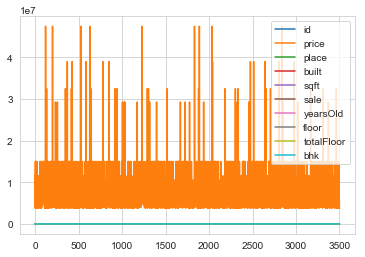

In [15]:
hp.plot()

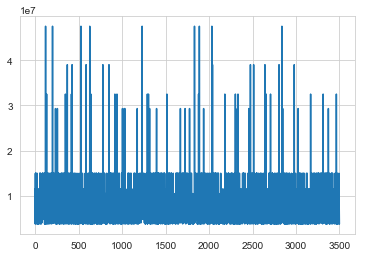

In [16]:
hp.price.plot()

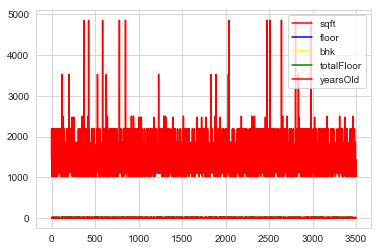

In [17]:
#plot several variables
graph_data = hp.loc[:,["sqft","floor","bhk" ,"totalFloor" , "yearsOld"]]

color_theme = ['red', 'blue','yellow','green']
graph_data.plot(color=color_theme)

In [18]:
hp.columns

Index(['id', 'price', 'place', 'built', 'sqft', 'sale', 'yearsOld', 'floor',
       'totalFloor', 'bhk'],
      dtype='object')

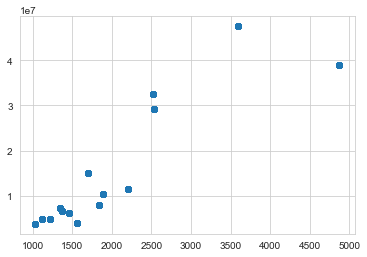

In [19]:
plt.scatter((hp["sqft"]  + hp["yearsOld"] +hp["floor"] +hp["totalFloor"] +hp["bhk"]) ,hp["price"])

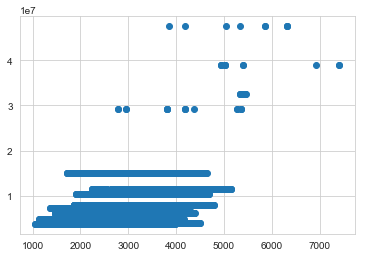

In [20]:
plt.scatter((hp["id"]+hp["place"]+ hp["built"] +hp["sqft"]+hp["sale"]+hp["yearsOld"]+hp["floor"] +hp["totalFloor"] +hp["bhk"]) ,hp["price"])

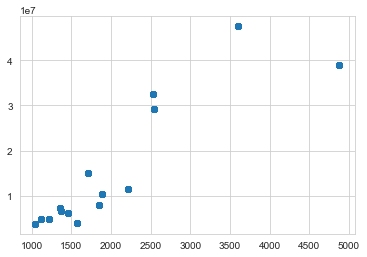

In [21]:
plt.scatter((hp["place"]  +hp["sqft"]  + hp["yearsOld"] +hp["floor"] +hp["totalFloor"] +hp["bhk"]) ,hp["price"])

In [22]:
#droping the sqft value , if sqrt > 3500
#hp = hp[hp["sqft"] < 3500]
    

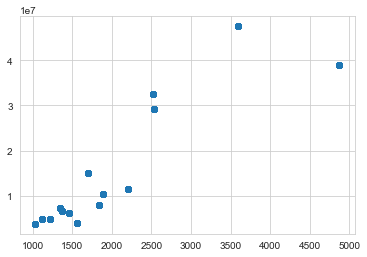

In [23]:
plt.scatter((hp["sqft"]  + hp["yearsOld"] +hp["floor"] +hp["totalFloor"] +hp["bhk"]) ,hp["price"])

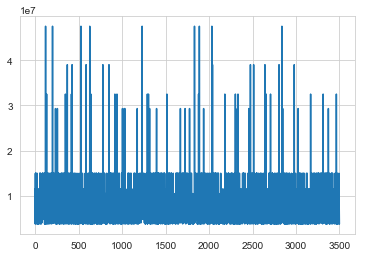

In [24]:
hp.price.plot()

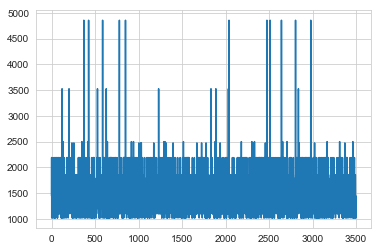

In [25]:

hp.sqft.plot()

In [26]:
hp.head(2)

,id,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,2,1,1450,0,5,1,4,1
1,2126,11500000,14,1,2190,0,5,3,5,3


In [27]:
# creating simple bar using X and Y 
#plt.bar(hp.sqft,y)

In [28]:
# feature engineering
x = hp.loc[:,["id","place","built","sqft","sale","yearsOld","floor","totalFloor","bhk"]]
y = hp.price

In [29]:
x.head(2)

,id,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,2,1,1450,0,5,1,4,1
1,2126,14,1,2190,0,5,3,5,3


In [30]:

#print("X  :  " , x)
print()

#print("Y  :  ", y)
print()
#print(x)

x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = 10)

#print(y_train)
# print(x_train)

linear_regression_model = LinearRegression()
#print(linear_regression_model)
#print()

linear_regression_model.fit(x_train,y_train)

predict_x = linear_regression_model.predict(x_test)
#print(" predict_x :  " ,predict_x)

r2_score_accuracy = r2_score(y_test , predict_x )# r2_score is standrad accuracy
print("linear rgression r2_score_accuracy : " , r2_score_accuracy)
#print()

mean_squared_error_accuracy = mean_squared_error(y_test , predict_x )
print("linear rgression mean_squared_error_accuracy : " ,mean_squared_error_accuracy)
print()

# check the accuracy on the training set
print("Accuracy on training set: ", linear_regression_model.score(x_train, y_train))
# check the accuracy on the test set
print("Accuracy on test set: ", linear_regression_model.score(x_test, y_test))
print(x_test.head(10))




linear rgression r2_score_accuracy :  0.8814760246811135
linear rgression mean_squared_error_accuracy :  3229269363623.1724

Accuracy on training set:  0.8479682335548173
Accuracy on test set:  0.8814760246811135
        id  place  built  sqft  sale  yearsOld  floor  totalFloor  bhk
2509   837      4      1  1543     0        10      3           4    3
3344  2077      3      1  1672     0        10      6          10    6
1361  2536      2      1  1450     0         5      1           4    1
188   1987      2      1  1450     0         5      1           4    1
1707  2849      3      1  1672     0        10      6          10    6
3090  2513      7      1  1100     0         5      3           4    3
1591   451     13      1  1330     0        10      1           4    1
1476   431     13      1  1330     0        10      1           4    1
838    435      4      1  1543     0        10      3           4    3
616   1649     12      1  1019     0         1      2           5    2


In [31]:
decision_tree_regression_model = DecisionTreeRegressor()
decision_tree_regression_model.fit(x_train,y_train)

predict_x = decision_tree_regression_model.predict(x_test)
#print(" predict_x :  " ,predict_x)

r2_score_accuracy = r2_score(y_test , predict_x )# r2_score is standrad accuracy
print("decision_tree_regression_model r2_score_accuracy : " , r2_score_accuracy)
print()

mean_squared_error_accuracy = mean_squared_error(y_test , predict_x )
print("decision_tree_regression_model mean_squared_error_accuracy : " ,mean_squared_error_accuracy)
print()

# check the accuracy on the training set
print("Accuracy on training set: ", decision_tree_regression_model.score(x_train, y_train))
# check the accuracy on the test set
print("Accuracy on test set: ", decision_tree_regression_model.score(x_test, y_test))

decision_tree_regression_model r2_score_accuracy :  1.0

decision_tree_regression_model mean_squared_error_accuracy :  0.0

Accuracy on training set:  1.0
Accuracy on test set:  1.0


In [32]:
x_test.columns,decision_tree_regression_model.feature_importances_

(Index(['id', 'place', 'built', 'sqft', 'sale', 'yearsOld', 'floor',
        'totalFloor', 'bhk'],
       dtype='object'),
 array([0.00000000e+00, 1.60543916e-02, 0.00000000e+00, 9.31018862e-01,
        0.00000000e+00, 2.09165252e-03, 2.49400064e-02, 8.46594036e-04,
        2.50484936e-02]))

In [33]:
random_forest_regression_model = RandomForestRegressor()

x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = 7)

random_forest_regression_model.fit(x_train,y_train)

predict_x = random_forest_regression_model.predict(x_test)
#print(" predict_x :  " ,predict_x)

r2_score_accuracy = r2_score(y_test , predict_x )# r2_score is standrad accuracy
print("random_forest_regression_model r2_score_accuracy : " , r2_score_accuracy)
print()

mean_squared_error_accuracy = mean_squared_error(y_test , predict_x )
print("random_forest_regression_model mean_squared_error_accuracy : " ,mean_squared_error_accuracy)
print()

# check the accuracy on the training set
print("Accuracy on training set: ", random_forest_regression_model.score(x_train, y_train))
# check the accuracy on the test set
print("Accuracy on test set: ", random_forest_regression_model.score(x_test, y_test))

random_forest_regression_model r2_score_accuracy :  0.9998769841548284

random_forest_regression_model mean_squared_error_accuracy :  3159771428.571429

Accuracy on training set:  1.0
Accuracy on test set:  0.9998769841548284


In [34]:
print("Training Features Shape:", x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2625, 9)
Training Labels Shape: (2625,)
Testing Features Shape: (875, 9)
Testing Labels Shape: (875,)


In [35]:
#print("x train is  :  ", x_train)
print()

#print("y train is  :  ",y_train)


In [36]:
#print("x test is  :  ",x_test)
print()

#print("y test is  :  ",y_test)


In [37]:

print("skew : " , stats.skew(hp.sqft))
print()

print("kurtosis : " , stats.kurtosis(hp.sqft))
print()

#print("coefficient : ",model.coef_)


skew :  2.0598294564758115

kurtosis :  12.327838959810109



In [38]:
print("x train head : ")
print(x_train.head(1))

print("y train head :" )
print(y_train.head(1))

x train head : 
        id  place  built  sqft  sale  yearsOld  floor  totalFloor  bhk
1420  2701      3      1  1672     0        10      6          10    6
y train head :
1420    15000000
Name: price, dtype: int64


In [39]:
# print(model.predict([[1450, 1 , 1 ,2 , 3]]))
# print()

# print(model.predict([[1450, 1 , 0 ,2 , 1]]))
# print()

# print(model.predict([[1400, 1 , 0 ,2 , 1]]))
# print()

# print(model.predict([[1400, 1 , 1 ,2 , 3]]))

In [40]:
names = ["Linear Regression",         
         "Decision Tree Regression",
         "Random Forest Regression",
         "XGB Regressor"   
        ]

In [41]:
algorithms = [ LinearRegression(),
              DecisionTreeRegressor(),
              RandomForestRegressor(),
              XGBRegressor()
              ]

In [42]:
columns_name = ["Model_name", "Random_state",'r2_score']

In [43]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
    

In [44]:
random_state_list_up_to_10 = [0,1,2,3,4,5,6,7,8,9,10]
random_state_list_10_up_to_20 = [10,11,12,13,14,15,16,17,18,19,20]

In [45]:
addRandomStateForAlgorithm(x, y,names,algorithms,columns_name,random_state_list_up_to_10)

                  Model_name  Random_state  r2_score
0          Linear Regression             0  0.864431
1          Linear Regression             1  0.841275
2          Linear Regression             2  0.842930
3          Linear Regression             3  0.875680
4          Linear Regression             4  0.819867
5          Linear Regression             5  0.865792
6          Linear Regression             6  0.845014
7          Linear Regression             7  0.865988
8          Linear Regression             8  0.859320
9          Linear Regression             9  0.845247
10         Linear Regression            10  0.881476
11  Decision Tree Regression             0  1.000000
12  Decision Tree Regression             1  1.000000
13  Decision Tree Regression             2  1.000000
14  Decision Tree Regression             3  1.000000
15  Decision Tree Regression             4  1.000000
16  Decision Tree Regression             5  1.000000
17  Decision Tree Regression             6  1.

In [46]:
#addRandomStateForAlgorithm(x, y,names,algorithms,columns_name,random_state_list_10_up_to_20)

In [47]:
x.shape,hp.shape

((3500, 9), (3500, 10))

In [48]:
hp.head()

,id,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,2,1,1450,0,5,1,4,1
1,2126,11500000,14,1,2190,0,5,3,5,3
2,816,3800000,12,1,1019,0,1,2,5,2
3,2708,10500000,1,1,1857,0,15,4,5,4
4,1041,11500000,14,1,2190,0,5,3,5,3


In [49]:
x=hp.drop(["id","built","sale","price"],1)
y=hp["price"]

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=3)

In [51]:
x_test.head(10)

,place,sqft,yearsOld,floor,totalFloor,bhk
439,12,1019,1,2,5,2
1365,3,1672,10,6,10,6
2803,0,1200,10,1,4,1
3197,7,1100,5,3,4,3
1044,12,1019,1,2,5,2
1730,2,1450,5,1,4,1
2959,1,1857,15,4,5,4
1081,12,1019,1,2,5,2
1476,13,1330,10,1,4,1
1865,12,1019,1,2,5,2


In [52]:
lm1=LinearRegression()
lm1.fit(x_train,y_train)
lm1.score(x_train,y_train)


0.835097898461768

In [53]:
y_lm1=lm1.predict(x_test)
print(r2_score(y_test,y_lm1))

0.8605479694549594


In [54]:
x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = 3)


In [55]:
model_xgboost_reg = XGBRegressor()
model_xgboost_reg.fit(x_train , y_train)
predict_xgboost_reg = model_xgboost_reg.predict(x_test)

In [56]:
accuracy_xgboost_reg = r2_score(y_test ,predict_xgboost_reg )
print(accuracy_xgboost_reg)

0.9999823460608174
